In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data

In [85]:
# import data from csv file
df = pd.read_csv('disney.csv')
df = df[df['country'] == 'United States'].reset_index()

In [86]:
df.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
1,3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
2,4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...
3,6,s7,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goo...",United States,"September 17, 2021",2009,PG,106 min,"Comedy, Romance, Romantic Comedy",Becky writes a personal finance column en rout...
4,13,s14,TV Show,Life Below Zero,NaN,"Chip Hailstone, Agnes Hailstone, Sue Aikens, A...",United States,"September 15, 2021",2012,TV-14,16 Seasons,"Action-Adventure, Animals & Nature, Docuseries",Experience life deep in Alaska where the prima...


In [87]:
# check for missing values
df.isna().sum().loc[df.isna().sum() > 0].sort_values(ascending = False)

director      258
cast          121
date_added      2
dtype: int64

In [88]:
# fill / drop missing values
df.director.fillna('Unknown', inplace = True)
df.cast.fillna('Unknown', inplace = True)
df.dropna(inplace = True)

In [6]:
# check for duplicated values
df.duplicated().loc[df.duplicated() == True]

Series([], dtype: bool)

# Manipulate and Analyze the data

##### categorical data analysis ↓

In [7]:
type_analys = df.groupby('type')[['show_id']].agg('count').rename(columns = {'show_id' : 'Count'})
type_analys

,Count
type,
Movie,752
TV Show,222


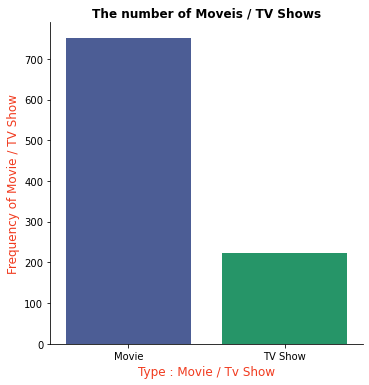

In [8]:
# visualization
sns.catplot(x = "type", data = df, kind= "count", palette = ['#4056A1', '#14A76C'])
plt.xlabel('Type : Movie / Tv Show', size = 12, color = '#F13C20')
plt.ylabel('Frequency of Movie / TV Show', size = 12, color = '#F13C20')
plt.title('The number of Moveis / TV Shows', weight = 'bold')
plt.show()

In [9]:
rating_analys = df.groupby('rating')[['show_id']].agg('count').rename(columns = {'show_id' : 'Count'})
rating_analys

,Count
rating,
G,183
PG,167
PG-13,44
TV-14,41
TV-G,248
TV-PG,175
TV-Y,21
TV-Y7,90
TV-Y7-FV,5


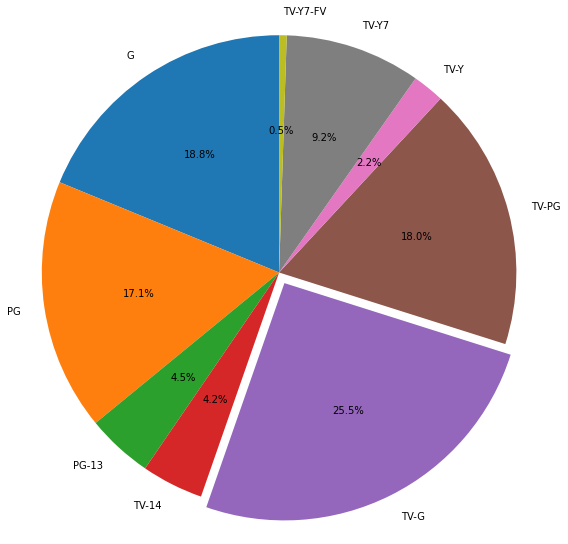

In [10]:
# visualization of rating analysis
fig, ax = plt.subplots(figsize = (9.5, 9.5))
explode = (0, 0, 0, 0, 0.05, 0, 0, 0, 0)
ax.pie(rating_analys['Count'], explode = explode,  labels = rating_analys.index, autopct = '%1.1f%%', startangle = 90)
ax.axis('equal')
plt.show()

##### numerical data analysis ↓

In [11]:
pd.options.mode.chained_assignment = None
movie_duration = df[df['type'] == 'Movie']
arr = []
for i, row in movie_duration.iterrows():
    
    row['duration'] = row['duration'].replace('min', '')
    arr.append(int(row['duration'].strip()))

movie_duration['duration'] = arr
movie_duration.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,6,s7,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goo...",United States,"September 17, 2021",2009,PG,106,"Comedy, Romance, Romantic Comedy",Becky writes a personal finance column en rout...
5,19,s20,Movie,Twenty Something,Aphton Corbin,"Kaylin Price, Ariana Brown, Aliyah Taylor, Jan...",United States,"September 10, 2021",2021,PG,11,"Animation, Family","Adulting is hard. One day you're nailing it, t..."
10,24,s25,Movie,Happier Than Ever: A Love Letter to Los Angeles,"Robert Rodriguez, Patrick Osborne","Billie Eilish, FINNEAS",United States,"September 3, 2021",2021,TV-14,66,"Concert Film, Music","Billie Eilish makes her Disney+ debut with ""Ha..."
13,30,s31,Movie,Dan in Real Life,Peter Hedges,"Steve Carell, Juliette Binoche, Dane Cook, Joh...",United States,"August 27, 2021",2007,PG-13,99,"Comedy, Drama, Romance",A relationship expert falls in love with his b...


In [12]:
# divide into category (duration range)
duration = movie_duration['duration']
bins = [2, 30, 60, 90, movie_duration['duration'].max()]
labels = ['2-30', '31-60', '61-90', '91-more']
movie_duration['duration_range'] = pd.cut(duration, bins, labels = labels, include_lowest = True)
movie_duration.head(4)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_range
0,2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,91-more
3,6,s7,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goo...",United States,"September 17, 2021",2009,PG,106,"Comedy, Romance, Romantic Comedy",Becky writes a personal finance column en rout...,91-more
5,19,s20,Movie,Twenty Something,Aphton Corbin,"Kaylin Price, Ariana Brown, Aliyah Taylor, Jan...",United States,"September 10, 2021",2021,PG,11,"Animation, Family","Adulting is hard. One day you're nailing it, t...",2-30
10,24,s25,Movie,Happier Than Ever: A Love Letter to Los Angeles,"Robert Rodriguez, Patrick Osborne","Billie Eilish, FINNEAS",United States,"September 3, 2021",2021,TV-14,66,"Concert Film, Music","Billie Eilish makes her Disney+ debut with ""Ha...",61-90


In [13]:
duration_analys = movie_duration.groupby('duration_range')[['show_id']].agg('count').rename(columns = {'show_id' : 'Count'})
duration_analys

,Count
duration_range,
2-30,179
31-60,71
61-90,204
91-more,298


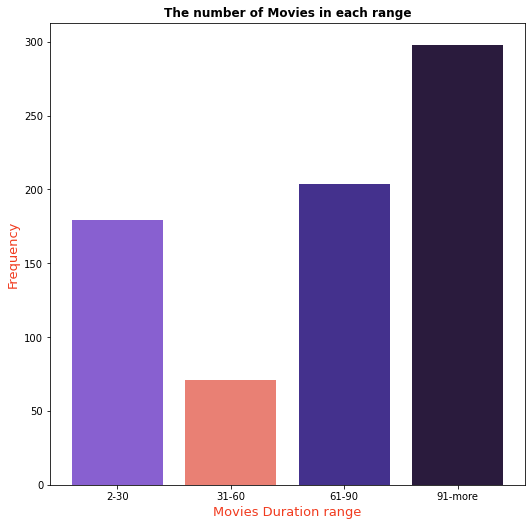

In [14]:
# visualization of duration analysis
fig, ax = plt.subplots(figsize = (8.5, 8.5))
ax.bar(duration_analys.index, duration_analys['Count'], color = ['#8860D0', '#E98074', '#44318D', '#2A1B3D'])
plt.xlabel('Movies Duration range',size = 13, color = '#F13C20')
plt.ylabel('Frequency', size = 13, color = '#F13C20')
plt.title('The number of Movies in each range', weight = 'bold')
plt.show()

##### set of two variable data analysis ↓

In [15]:
grouped_data = df.groupby(['type', 'rating']).agg({'rating' : 'count'}).rename(columns = {'rating' : 'count'})
grouped_data = grouped_data.reset_index()

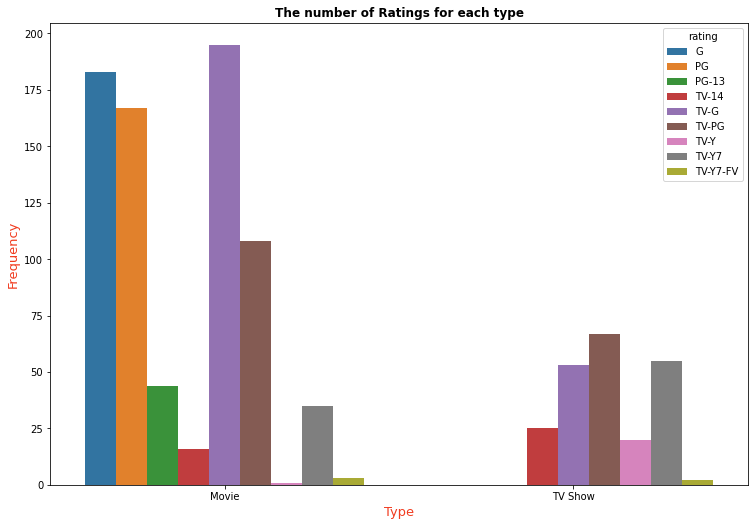

In [16]:
fix, ax = plt.subplots(figsize = (12.5, 8.5))
sns.barplot(ax = ax, data = grouped_data, x = 'type', y = 'count', hue = 'rating')
ax.set_xlabel('Type', size = 13, color = '#F13C20')
ax.set_ylabel('Frequency', size = 13, color = '#F13C20')
plt.title('The number of Ratings for each type', weight = 'bold')
plt.show()

##### datetime data analysis ↓

In [17]:
# dividing release years into category
year = df['release_year']
bins = [1928, 1940, 1980, 2000, df['release_year'].max()]
labels = ['1928-1940', '1941-1980', '1981-2000', '2001-2021']
df['release_year_range'] = pd.cut(year, bins, labels = labels, include_lowest = True)
df.head(4)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_range
0,2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,2001-2021
1,3,s4,TV Show,Dog: Impossible,Unknown,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...,2001-2021
2,4,s5,TV Show,Spidey And His Amazing Friends,Unknown,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...,2001-2021
3,6,s7,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goo...",United States,"September 17, 2021",2009,PG,106 min,"Comedy, Romance, Romantic Comedy",Becky writes a personal finance column en rout...,2001-2021


In [18]:
year_analys = df.groupby('release_year_range')[['show_id']].agg('count').rename(columns = {'show_id' : 'Count'})
year_analys

,Count
release_year_range,
1928-1940,43
1941-1980,145
1981-2000,152
2001-2021,634


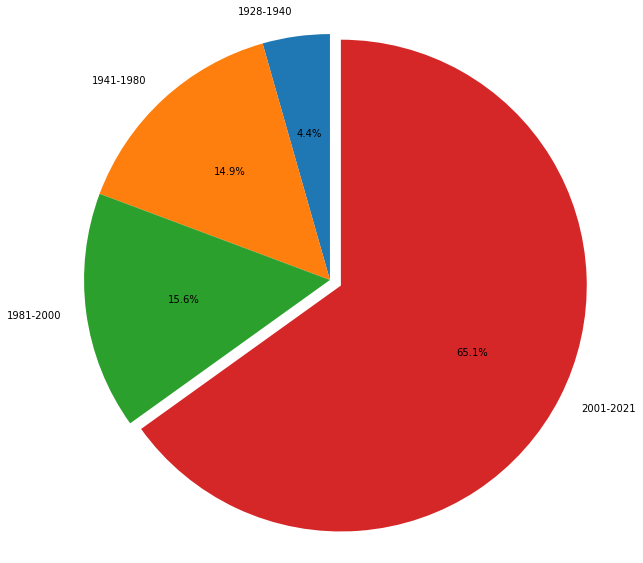

In [19]:
# visualization of year analysis
fig, ax = plt.subplots(figsize = (10, 10))
explode = (0, 0, 0, 0.05)
ax.pie(year_analys['Count'], explode = explode,  labels = year_analys.index, autopct = '%1.1f%%', startangle = 90)
ax.axis('equal')
plt.show()

In [20]:
import warnings
warnings.filterwarnings("ignore")

# pick most popular release_year_range and analyze each year in it
popular_shows = df[df['release_year_range'] == '2001-2021']
grouped_new = popular_shows.groupby('release_year')[['show_id']].agg('count').rename(columns = {'show_id' : 'count'})
grouped_new = grouped_new.sort_values(by = 'count', ascending = False).iloc[:10].sort_index()
grouped_new

,count
release_year,
2010,32
2011,34
2012,27
2014,35
2015,29
2016,38
2017,38
2018,33
2019,66


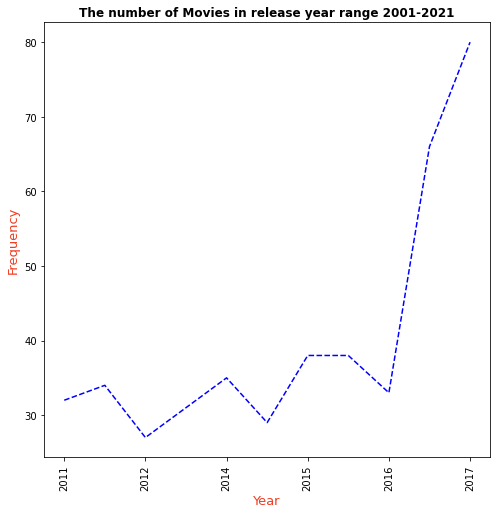

In [21]:
# visualization of most popular shows release year
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(grouped_new.index, grouped_new['count'], linestyle = '--', color = 'b')
ax.set_xticklabels(grouped_new.index, rotation = 90)
ax.set_ylabel('Frequency', size = 13, color = '#F13C20')
ax.set_xlabel('Year', size = 13, color = '#F13C20')
plt.title('The number of Movies in release year range 2001-2021', weight = 'bold')
plt.show()

##### groupby + filter ↓

In [22]:
# getting grouped Movies by rating and filtered by duration mean over than 100
movie_duration.groupby('rating').filter(lambda x : x['duration'].mean() > 100)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_range
0,2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,91-more
13,30,s31,Movie,Dan in Real Life,Peter Hedges,"Steve Carell, Juliette Binoche, Dane Cook, Joh...",United States,"August 27, 2021",2007,PG-13,99,"Comedy, Drama, Romance",A relationship expert falls in love with his b...,91-more
19,42,s43,Movie,X-Men,Bryan Singer,"Patrick Stewart, Hugh Jackman, Ian McKellen, H...",United States,"August 13, 2021",2000,PG-13,105,"Action-Adventure, Family, Science Fiction","The X-Men, a small band of outcast mutants, fi...",91-more
24,51,s52,Movie,Mrs. Doubtfire,Chris Columbus,"Robin Williams, Sally Field, Pierce Brosnan, H...",United States,"August 6, 2021",1993,PG-13,126,"Comedy, Drama",An eccentric dad dresses as a British nanny so...,91-more
50,120,s121,Movie,Red Tails,Anthony Hemingway,"Terrence Howard, Cuba Gooding Jr., Nate Parker...",United States,"June 4, 2021",2012,PG-13,126,"Action-Adventure, Drama, Historical",Black fighter pilots get the chance to prove t...,91-more
146,306,s307,Movie,Clouds,Justin Baldoni,"Fin Argus, Sabrina Carpenter, Madison Iseman, ...",United States,"October 16, 2020",2020,PG-13,122,"Biographical, Drama, Music",A young musician with months to live turns to ...,91-more
160,331,s332,Movie,Ever After: A Cinderella Story,Andy Tennant,"Drew Barrymore, Anjelica Huston, Dougray Scott...",United States,"September 18, 2020",1998,PG-13,122,"Drama, Romance",A young woman falls in love with a prince whil...,91-more
175,355,s356,Movie,Marvel Studios' Ant-Man and the Wasp,Peyton Reed,"Paul Rudd, Evangeline Lilly, Michael Peña, Wal...",United States,"August 14, 2020",2018,PG-13,120,"Action-Adventure, Comedy, Science Fiction",Ant-Man and the Wasp must join forces to uncov...,91-more
183,364,s365,Movie,Prince of Persia: The Sands of Time,Mike Newell,"Jake Gyllenhaal, Ben Kingsley, Gemma Arterton,...",United States,"August 7, 2020",2010,PG-13,117,"Action-Adventure, Fantasy",A rogue prince and rival princess safeguard a ...,91-more
190,384,s385,Movie,Pirates of the Caribbean: Dead Men Tell No Tales,"Joachim Rønning, Espen Sandberg","Johnny Depp, Javier Bardem, Brenton Thwaites, ...",United States,"July 24, 2020",2017,PG-13,129,"Action-Adventure, Fantasy",Captain Jack Sparrow searches for the Trident ...,91-more


##### own data analysis ↓

In [23]:
pd.options.mode.chained_assignment = None
tv_show_duration = df[df['type'] == 'TV Show']

arr = []
for i, row in tv_show_duration.iterrows():
    
    row['duration'] = row['duration'].replace('Season', '')
    row['duration'] = row['duration'].replace('s', '')
    arr.append(int(row['duration'].strip()))

tv_show_duration['duration'] = arr
tv_show_duration.head(4)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_range
1,3,s4,TV Show,Dog: Impossible,Unknown,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...,2001-2021
2,4,s5,TV Show,Spidey And His Amazing Friends,Unknown,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...,2001-2021
4,13,s14,TV Show,Life Below Zero,Unknown,"Chip Hailstone, Agnes Hailstone, Sue Aikens, A...",United States,"September 15, 2021",2012,TV-14,16,"Action-Adventure, Animals & Nature, Docuseries",Experience life deep in Alaska where the prima...,2001-2021
6,20,s21,TV Show,"Doogie Kamealoha, M.D.",Unknown,"Peyton Elizabeth Lee, Emma Meisel, Matthew Sat...",United States,"September 8, 2021",2021,TV-PG,1,"Comedy, Coming of Age, Family",A 16-year-old prodigy juggles her budding medi...,2001-2021


In [24]:
# dividing Tv Shows into duration range
duration_show = tv_show_duration['duration']
bins = [1, 4, 10, tv_show_duration['duration'].max()]
labels = ['1-4', '5-10', '11-more']
tv_show_duration['duration_range'] = pd.cut(duration_show, bins, labels = labels, include_lowest = True)
tv_show_duration.head(4)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_range,duration_range
1,3,s4,TV Show,Dog: Impossible,Unknown,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...,2001-2021,1-4
2,4,s5,TV Show,Spidey And His Amazing Friends,Unknown,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...,2001-2021,1-4
4,13,s14,TV Show,Life Below Zero,Unknown,"Chip Hailstone, Agnes Hailstone, Sue Aikens, A...",United States,"September 15, 2021",2012,TV-14,16,"Action-Adventure, Animals & Nature, Docuseries",Experience life deep in Alaska where the prima...,2001-2021,11-more
6,20,s21,TV Show,"Doogie Kamealoha, M.D.",Unknown,"Peyton Elizabeth Lee, Emma Meisel, Matthew Sat...",United States,"September 8, 2021",2021,TV-PG,1,"Comedy, Coming of Age, Family",A 16-year-old prodigy juggles her budding medi...,2001-2021,1-4


In [25]:
tv_show_duration_analysis = tv_show_duration.groupby('duration_range')[['show_id']].agg('count').rename(columns = {'show_id' : 'count'})
tv_show_duration_analysis

,count
duration_range,
1-4,203
5-10,16
11-more,3


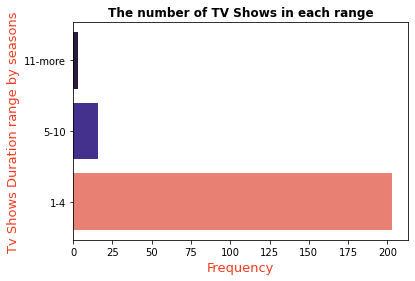

In [26]:
# visualization of Tv Show duration
x = tv_show_duration_analysis.index
y = tv_show_duration_analysis['count']
plt.barh(x, y, color = ['#E98074', '#44318D', '#2A1B3D'])
plt.xlabel('Frequency', size = 13, color = '#F13C20')
plt.ylabel('Tv Shows Duration range by seasons', size = 13, color = '#F13C20')
plt.title('The number of TV Shows in each range', weight = 'bold')
plt.show()

# End of Coding Part